In [50]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.signal import find_peaks

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from integrals import *

In [111]:
p = 5
e = -0.803

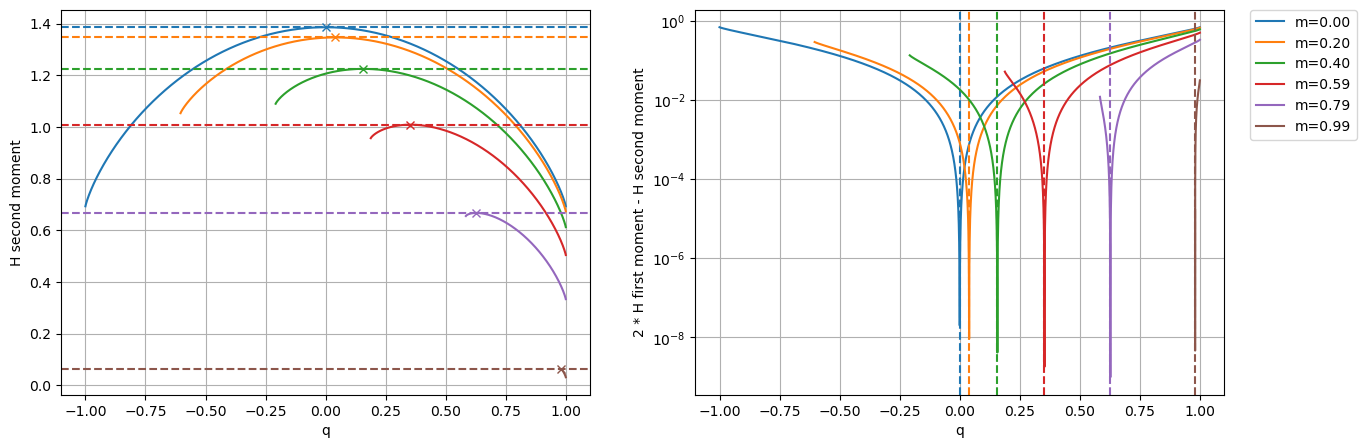

In [112]:
ms = np.linspace(0.0, 0.99, 6)

plt.figure(figsize=(15, 5))

for idx, m in enumerate(ms):
    qs = np.linspace(2 * m - 1 + 1e-5, 1.0 - 1e-5, 5_000)

    H_second_moment = second_moment_H(m, qs)

    peaks, _ = find_peaks(H_second_moment)
    maxima = qs[peaks]

    plt.subplot(1, 2, 1)
    plt.plot(qs[peaks], H_second_moment[peaks], "x", color=f"C{idx}")
    plt.plot(qs, H_second_moment, label=f"m={m:.2f}", color=f"C{idx}")
    plt.axhline(2 * first_moment_H(m), color=f"C{idx}", linestyle="--")

    plt.subplot(1, 2, 2)
    plt.plot(
        qs, 2 * first_moment_H(m) - H_second_moment, label=f"m={m:.2f}", color=f"C{idx}"
    )
    plt.axvline(m**2, color=f"C{idx}", linestyle="--")

plt.subplot(1, 2, 1)
plt.ylabel("H second moment")
plt.xlabel("q")
plt.grid()

plt.subplot(1, 2, 2)
plt.yscale("log")
plt.ylabel("2 * H first moment - H second moment")

plt.xlabel("q")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)

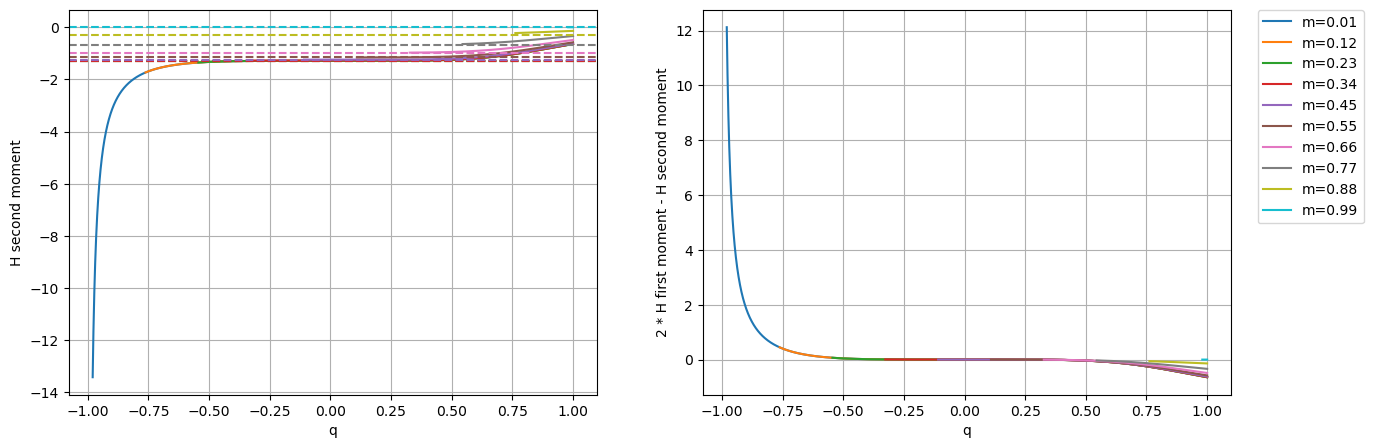

In [113]:
ms = np.linspace(0.01, 0.99, 10)

plt.figure(figsize=(15, 5))

for idx, m in enumerate(ms):
    qs = np.linspace(2 * m - 1 + 1e-5, 1.0 - 1e-5, 5_000)

    energy_part_second_moment = -2 * e**2 * (1 - m**p) ** 2 / (1 + qs**p)
    energy_part_first_moment = -(e**2) * (1 - m**p) ** 2

    # peaks, _ = find_peaks(H_second_moment)
    # maxima = qs[peaks]

    plt.subplot(1, 2, 1)
    # plt.plot(qs[peaks], H_second_moment[peaks], "x", color=f"C{idx}")
    plt.plot(qs, energy_part_second_moment, label=f"m={m:.2f}", color=f"C{idx}")
    plt.axhline(2 * energy_part_first_moment, color=f"C{idx}", linestyle="--")

    plt.subplot(1, 2, 2)
    plt.plot(
        qs, 2 * energy_part_first_moment - energy_part_second_moment, label=f"m={m:.2f}", color=f"C{idx}"
    )
    # plt.axvline(m**2, color=f"C{idx}", linestyle="--")

plt.subplot(1, 2, 1)
plt.ylabel("H second moment")
plt.xlabel("q")
plt.grid()

plt.subplot(1, 2, 2)
# plt.yscale("log")
plt.ylabel("2 * H first moment - H second moment")

plt.xlabel("q")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)

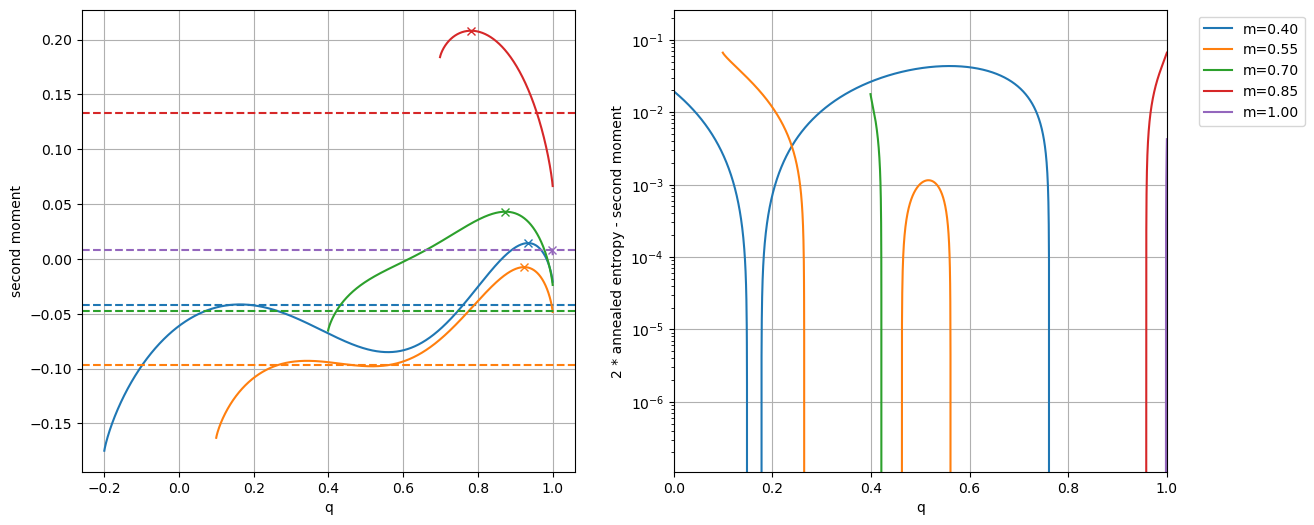

In [162]:
# ms = np.linspace(0.01, 0.99, 10)
ms = np.linspace(0.4, 0.999, 5)

plt.figure(figsize=(14, 6))

for i, m in enumerate(ms):
    qs = np.linspace(2 * m - 1 + 1e-5, 1.0 - 1e-5, 5_000)

    sms = np.array([second_moment_bound(m, q, e, p) for q in qs])

    # peaks, _ = find_peaks(sms)
    # plt.plot(
    #     qs[peaks],
    #     sms[peaks],
    #     "o",
    #     color=f"C{i}",
    # )

    max_idx = np.argmax(sms)

    plt.subplot(1, 2, 1)
    plt.plot(qs, sms, color=f"C{i}", label=f"m={m:.2f}")
    plt.plot(qs[max_idx], sms[max_idx], "x", color=f"C{i}")
    plt.axhline(2 * annealed_entropy(m, e, p), color=f"C{i}", linestyle="--")

    plt.subplot(1, 2, 2)
    plt.plot(qs, (2 * annealed_entropy(m, e, p) - sms), label=f"m={m:.2f}", color=f"C{i}")
    plt.plot(qs[max_idx], (2 * annealed_entropy(m, e, p) - sms[max_idx]), "x", color=f"C{i}")
    # plt.axvline(m**2, color=f"C{i}", linestyle="--")

    # plt.axvline(2*m-1, color=f"C{i}", linewidth=0.5)

plt.subplot(1, 2, 1)
plt.xlabel("q")
plt.ylabel("second moment")
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel("q")
plt.ylabel("2 * annealed entropy - second moment")
plt.yscale("log")
# plt.xlim(np.min(ms)**2 - 0.1, np.max(ms)**2 + 0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0.0, 1.0)
plt.grid()

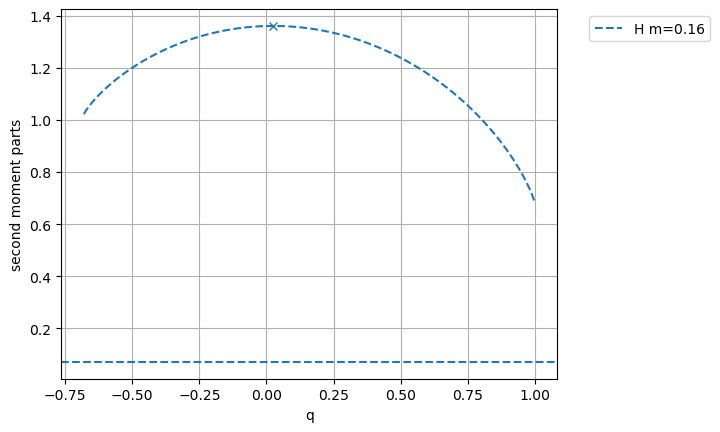

In [131]:
# ms = np.linspace(0.01, 0.99, 10)
ms = np.linspace(0.16, 0.9, 1)


for i, m in enumerate(ms):
    qs = np.linspace(2 * m - 1 + 1e-5, 1.0 - 1e-5, 5_000)

    H2s = np.array([second_moment_H(m, q) for q in qs])
    Es = -2 * e**2 * (1 - m**p) ** 2 / (1 + qs**p)

    first_moment = annealed_entropy(m, e, p)

    max_idx = np.argmax(H2s)

    plt.plot(qs, H2s, '--', color=f"C{i}", label=f"H m={m:.2f}")
    plt.axhline(2 * first_moment, color=f"C{i}", linestyle="--")
    plt.plot(qs[max_idx], H2s[max_idx], "x", color=f"C{i}")

    # max_idx_2 = np.argmax(Es)
    # plt.plot(
    #     qs, Es, ':', color=f"C{i}", label=f"E m={m:.2f}"
    # )
    # plt.plot(qs[max_idx_2], Es[max_idx_2], "x", color=f"C{i}")

plt.xlabel("q")
plt.ylabel("second moment parts")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()

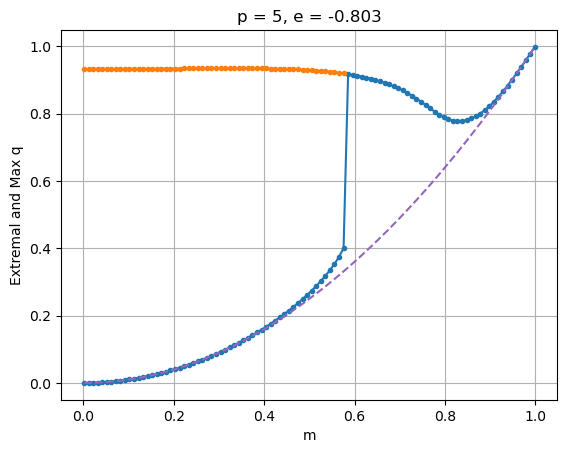

In [149]:
ms = np.linspace(0.001, 0.999, 100)
qs_maximal = np.nan * np.ones((len(ms), 4))

for i, m in enumerate(ms):
    qs = np.linspace(2 * m - 1 + 1e-5, 1.0 - 1e-5, 10_000)

    second_moment_potential = np.array([second_moment_bound(m, q, e, p) for q in qs])

    peaks, _ = find_peaks(second_moment_potential)
    max_idx = np.argmax(second_moment_potential)

    if not max_idx in peaks:
        extremas = np.append(peaks, max_idx)
    else:
        extremas = peaks

    for j, idx in enumerate(extremas[:4]):
        qs_maximal[i, j] = qs[idx]

plt.plot(ms, qs_maximal, ".-")
plt.plot(ms, ms**2, "--", label="m^2")
plt.xlabel("m")
plt.ylabel("Extremal and Max q")
plt.title(f"p = {p}, e = {e}")
plt.grid()

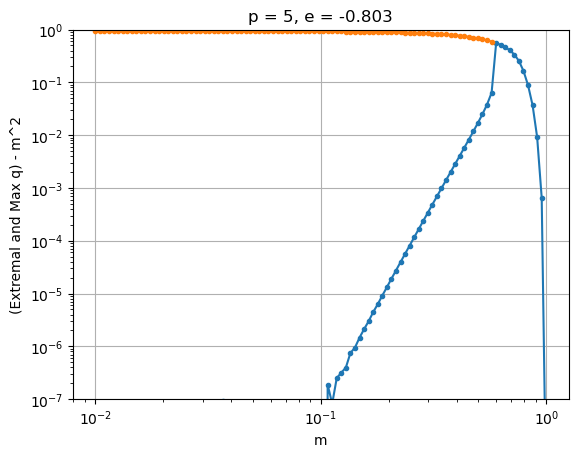

In [161]:
ms = np.logspace(-2, 0, 100)
qs_maximal = np.nan * np.ones((len(ms), 4))
n_points = 10_000_000

for i, m in enumerate(ms):
    qs = np.linspace(2 * m - 1 + 1e-9, 1.0 - 1e-9, n_points)

    second_moment_potential = second_moment_bound(m, qs, e, p)

    peaks, _ = find_peaks(second_moment_potential)
    max_idx = np.argmax(second_moment_potential)

    if not max_idx in peaks:
        extremas = np.append(peaks, max_idx)
    else:
        extremas = peaks

    for j, idx in enumerate(extremas[:4]):
        qs_maximal[i, j] = qs[idx]

plt.plot(ms, qs_maximal - ms[:,None]**2, ".-")
# plt.plot(ms, ms**2, "--", label="m^2")
plt.xlabel("m")
plt.ylabel("(Extremal and Max q) - m^2")
plt.title(f"p = {p}, e = {e}")
plt.xscale("log")
plt.yscale("log")
plt.ylim(n_points**(-1),1)
plt.grid()